# COVID-19 COMMUNITY MOBILITY REPORT FOR THE NETHERLANDS

#### Google LLC "Google COVID-19 Community Mobility Reports.
#### https://www.google.com/covid19/mobility/    Accessed: 28/04/2020

### Mobility Report Documentation

This dataset is intended to help remediate the impact of COVID-19. It shouldn’t be used for medical diagnostic, prognostic, or treatment purposes. It also isn’t intended to be used for guidance on personal travel plans.

Each Community Mobility Report dataset is presented by location and highlights the percent change in visits to places like grocery stores and parks within a geographic area.

Location accuracy and the understanding of categorized places varies from region to region, so we don’t recommend using this data to compare changes between countries, or between regions with different characteristics (e.g. rural versus urban areas).

We’ll leave a region or category out of the dataset if we don’t have sufficient statistically significant levels of data.

## A. PROCESSING THE DATA

### A.1. Importing the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### A.2. Scrapping the Dataset

In [2]:
URL="https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv"
#df=pd.read_csv(URL, low_memory=False) 
df=pd.read_csv('Global_Mobility_Report.csv', low_memory=False) 

### A.3. Cleaning and Manipulating Data

In [3]:
df=df[df.country_region_code=='NL']
df['date'] =  pd.to_datetime(df['date'])
df.set_index(pd.DatetimeIndex(df['date']), inplace=True)
df.head()

,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
date,,,,,,,,,,,
2020-02-15,NL,Netherlands,NaN,NaN,2020-02-15,1.0,1.0,11.0,3.0,0.0,0.0
2020-02-16,NL,Netherlands,NaN,NaN,2020-02-16,-10.0,-8.0,-31.0,-5.0,-3.0,2.0
2020-02-17,NL,Netherlands,NaN,NaN,2020-02-17,0.0,-1.0,8.0,-3.0,-5.0,1.0
2020-02-18,NL,Netherlands,NaN,NaN,2020-02-18,5.0,4.0,21.0,-3.0,-5.0,1.0
2020-02-19,NL,Netherlands,NaN,NaN,2020-02-19,3.0,0.0,20.0,-3.0,-5.0,1.0


In [4]:
df.shape


(819, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 819 entries, 2020-02-15 to 2020-04-17
Data columns (total 11 columns):
country_region_code                                   819 non-null object
country_region                                        819 non-null object
sub_region_1                                          756 non-null object
sub_region_2                                          0 non-null object
date                                                  819 non-null datetime64[ns]
retail_and_recreation_percent_change_from_baseline    819 non-null float64
grocery_and_pharmacy_percent_change_from_baseline     819 non-null float64
parks_percent_change_from_baseline                    819 non-null float64
transit_stations_percent_change_from_baseline         819 non-null float64
workplaces_percent_change_from_baseline               819 non-null float64
residential_percent_change_from_baseline              819 non-null float64
dtypes: datetime64[ns](1), float64(6), object(4)
m

In [6]:
df.isnull().sum()

country_region_code                                     0
country_region                                          0
sub_region_1                                           63
sub_region_2                                          819
date                                                    0
retail_and_recreation_percent_change_from_baseline      0
grocery_and_pharmacy_percent_change_from_baseline       0
parks_percent_change_from_baseline                      0
transit_stations_percent_change_from_baseline           0
workplaces_percent_change_from_baseline                 0
residential_percent_change_from_baseline                0
dtype: int64

In [7]:
df.drop('sub_region_2',1,inplace=True)

In [8]:
null_columns=df.columns[df.isnull().any()]
print(df[df.isnull().any(axis=1)][null_columns].head(63)) #The null values

           sub_region_1
date                   
2020-02-15          NaN
2020-02-16          NaN
2020-02-17          NaN
2020-02-18          NaN
2020-02-19          NaN
...                 ...
2020-04-13          NaN
2020-04-14          NaN
2020-04-15          NaN
2020-04-16          NaN
2020-04-17          NaN

[63 rows x 1 columns]


In [9]:
list(df)

['country_region_code',
 'country_region',
 'sub_region_1',
 'date',
 'retail_and_recreation_percent_change_from_baseline',
 'grocery_and_pharmacy_percent_change_from_baseline',
 'parks_percent_change_from_baseline',
 'transit_stations_percent_change_from_baseline',
 'workplaces_percent_change_from_baseline',
 'residential_percent_change_from_baseline']

### A.4. Re-Arranging the DataFrame (df)

In [10]:
df.rename(columns={'sub_region_1': 'Province',
                   'retail_and_recreation_percent_change_from_baseline': 'Retail_and_Recreation', 
                   'grocery_and_pharmacy_percent_change_from_baseline':'Grocery_and_Pharmacy', 
                   'parks_percent_change_from_baseline':'Parks',
                   'transit_stations_percent_change_from_baseline': 'Transit_Stations',
                   'workplaces_percent_change_from_baseline':'Workplaces',
                   'residential_percent_change_from_baseline': 'Residences',
                   'date':'Date'},inplace=True)

In [11]:
df=df[['Date',
 'Province',
 'Retail_and_Recreation',
 'Grocery_and_Pharmacy',
 'Parks',
 'Transit_Stations',
 'Workplaces',
 'Residences']]

In [12]:
df.Province=df.Province.replace(np.nan, 'The Netherlands (General)')

In [13]:
df.Province.value_counts()

Zeeland                      63
Gelderland                   63
North Brabant                63
Groningen                    63
The Netherlands (General)    63
South Holland                63
Drenthe                      63
Utrecht                      63
Limburg                      63
North Holland                63
Overijssel                   63
Flevoland                    63
Friesland                    63
Name: Province, dtype: int64

In [14]:
df.head()

,Date,Province,Retail_and_Recreation,Grocery_and_Pharmacy,Parks,Transit_Stations,Workplaces,Residences
date,,,,,,,,
2020-02-15,2020-02-15,The Netherlands (General),1.0,1.0,11.0,3.0,0.0,0.0
2020-02-16,2020-02-16,The Netherlands (General),-10.0,-8.0,-31.0,-5.0,-3.0,2.0
2020-02-17,2020-02-17,The Netherlands (General),0.0,-1.0,8.0,-3.0,-5.0,1.0
2020-02-18,2020-02-18,The Netherlands (General),5.0,4.0,21.0,-3.0,-5.0,1.0
2020-02-19,2020-02-19,The Netherlands (General),3.0,0.0,20.0,-3.0,-5.0,1.0


In [15]:
df.describe()

,Retail_and_Recreation,Grocery_and_Pharmacy,Parks,Transit_Stations,Workplaces,Residences
count,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000
mean,-23.246642,-5.566545,19.347985,-32.736264,-25.144078,9.139194
std,23.606601,13.240724,27.450774,29.348655,22.654657,7.896653
min,-81.000000,-73.000000,-59.000000,-82.000000,-88.000000,-1.000000
25%,-43.000000,-13.000000,1.000000,-60.000000,-46.000000,1.000000
50%,-29.000000,-3.000000,17.000000,-41.000000,-25.000000,9.000000
75%,0.000000,3.000000,35.000000,-3.000000,-1.000000,17.000000
max,51.000000,28.000000,128.000000,58.000000,5.000000,28.000000


### A.5. Setting a new Genral DataFrame(df_NL)

In [16]:
df_NL=df[df.Province=='The Netherlands (General)']

In [17]:
df_NL.describe()

,Retail_and_Recreation,Grocery_and_Pharmacy,Parks,Transit_Stations,Workplaces,Residences
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,-24.111111,-5.333333,14.936508,-34.301587,-25.809524,9.492063
std,23.440461,12.564671,20.751116,28.967521,22.392292,8.189043
min,-71.000000,-51.000000,-31.000000,-75.000000,-85.000000,0.000000
25%,-44.000000,-13.000000,-0.500000,-61.000000,-48.500000,1.000000
50%,-32.000000,-3.000000,15.000000,-51.000000,-26.000000,8.000000
75%,0.500000,2.000000,31.500000,-3.000000,-3.500000,18.000000
max,16.000000,24.000000,65.000000,10.000000,3.000000,27.000000


## B. Retail & Recreation

__Mobility trends for places like restaurants, cafes, shopping centers, theme parks, museums, libraries, and movie theaters.__

### B.1. The General Trend of Mobility in Retail and Recreation in the Netherlands 

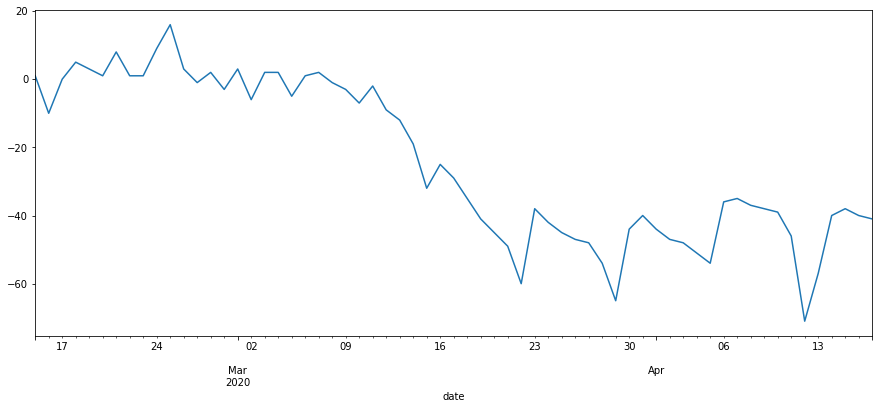

In [18]:
df_NL['Retail_and_Recreation'].plot(figsize=(15,6))

### B.2. The Time Series Analysis by Provinces on the Mobility in Retail and Recreation 

[None, None]

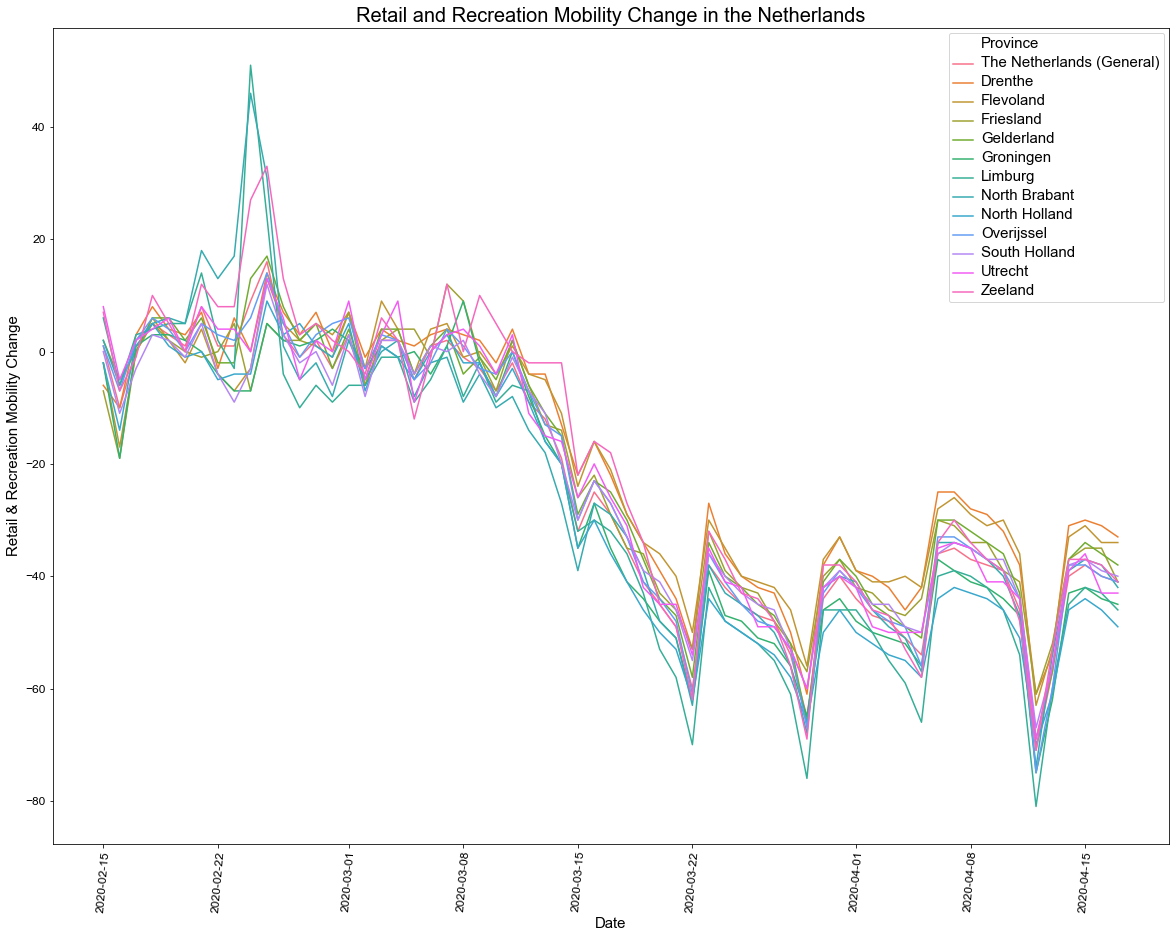

In [19]:
plt.figure(figsize=(20,15))
RR=sns.lineplot(x="Date", y="Retail_and_Recreation", hue='Province', data=df)
sns.set(style="whitegrid")
RR.axes.set_title("Retail and Recreation Mobility Change in the Netherlands",fontsize=20)
RR.set_xlabel("Date",fontsize=15)
RR.set_ylabel("Retail & Recreation Mobility Change",fontsize=15)
RR.tick_params(labelsize=12)
plt.xticks(rotation=85)
plt.setp(RR.get_legend().get_texts(), fontsize='15')
plt.setp(RR.get_legend().get_title(), fontsize='15') 

### B.3. The Percentage Change by Provinces in the Mobility in Retail and Recreation

In [20]:
result_RR = df.groupby(["Province"])['Retail_and_Recreation'].aggregate(np.mean).reset_index().sort_values('Retail_and_Recreation', ascending=True)
result_RR['Retail_and_Recreation']=np.absolute(result_RR['Retail_and_Recreation'])
result_RR

,Province,Retail_and_Recreation
7,North Holland,27.698413
5,Limburg,27.031746
4,Groningen,26.555556
10,The Netherlands (General),24.111111
9,South Holland,23.746032
6,North Brabant,23.666667
8,Overijssel,23.333333
11,Utrecht,22.825397
2,Friesland,22.111111
3,Gelderland,21.936508


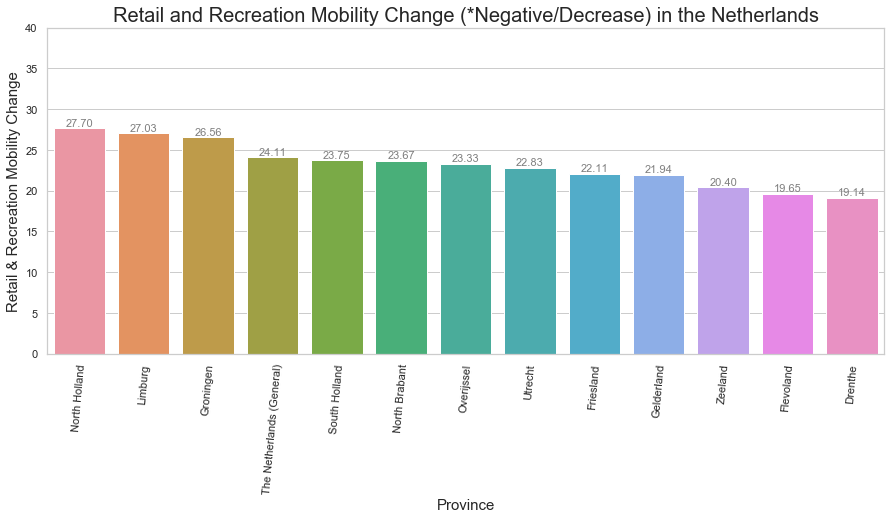

In [21]:
plt.figure(figsize=(15,6))
RR1=sns.barplot(x="Province", y="Retail_and_Recreation", data=result_RR)
sns.set(style="whitegrid")
RR1.axes.set_title("Retail and Recreation Mobility Change (*Negative/Decrease) in the Netherlands", fontsize=20)
RR1.set_xlabel("Province",fontsize=15)
RR1.set_ylabel("Retail & Recreation Mobility Change",fontsize=15)
plt.xticks(rotation=85)
for p in RR1.patches:
             RR1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 5),
                 textcoords='offset points')
_ = RR1.set_ylim(0,40)

## C. Grocery & Pharmacy

__Mobility trends for places like grocery markets, food warehouses, farmers markets, specialty food shops, drug stores, and pharmacies.__

### C.1. The General Trend of Mobility in Grocery and Pharmacy in the Netherlands 

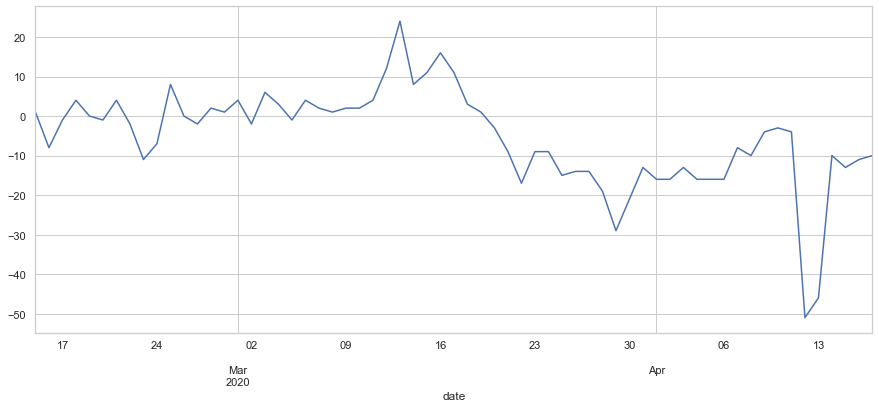

In [22]:
df_NL['Grocery_and_Pharmacy'].plot(figsize=(15,6))

### C.2. The Time Series Analysis by Provinces on the Mobility in Grocery and Pharmacy 

[None, None]

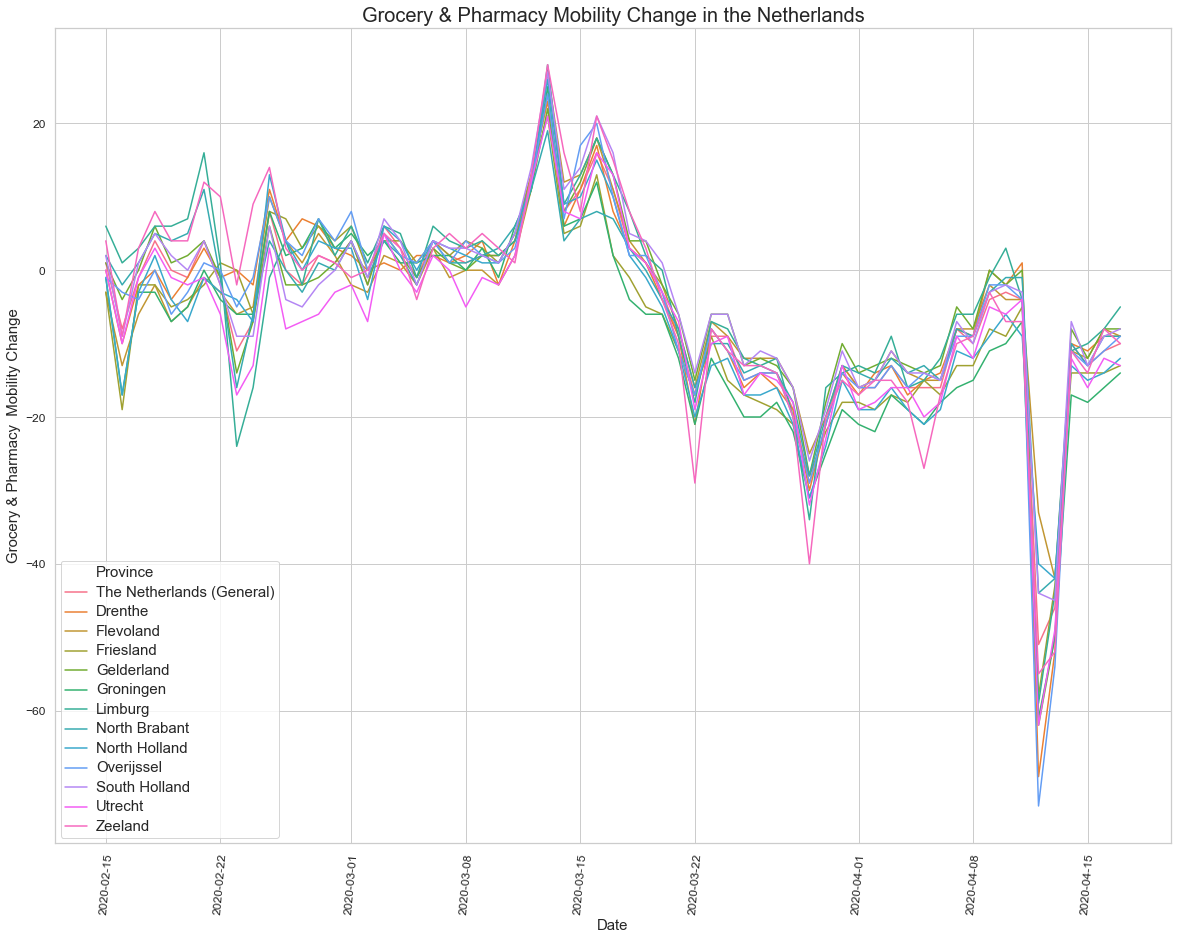

In [23]:
plt.figure(figsize=(20,15))
GP=sns.lineplot(x="Date", y="Grocery_and_Pharmacy", hue='Province', data=df)
sns.set(style="whitegrid")
GP.axes.set_title("Grocery & Pharmacy Mobility Change in the Netherlands",fontsize=20)
GP.set_xlabel("Date",fontsize=15)
GP.set_ylabel("Grocery & Pharmacy  Mobility Change",fontsize=15)
GP.tick_params(labelsize=12)
plt.xticks(rotation=85)
plt.setp(GP.get_legend().get_texts(), fontsize='15')
plt.setp(GP.get_legend().get_title(), fontsize='15') 

### C.3. The Percentage Change by Provinces in the Mobility in Grocery and Pharmacy

In [24]:
result_GP = df.groupby(["Province"])['Grocery_and_Pharmacy'].aggregate(np.mean).reset_index().sort_values('Grocery_and_Pharmacy', ascending=True)
result_GP['Grocery_and_Pharmacy']=np.absolute(result_GP['Grocery_and_Pharmacy'])
result_GP

,Province,Grocery_and_Pharmacy
4,Groningen,8.349206
11,Utrecht,7.714286
2,Friesland,6.904762
7,North Holland,6.523810
0,Drenthe,5.380952
10,The Netherlands (General),5.333333
8,Overijssel,5.301587
1,Flevoland,4.968254
6,North Brabant,4.952381
12,Zeeland,4.666667


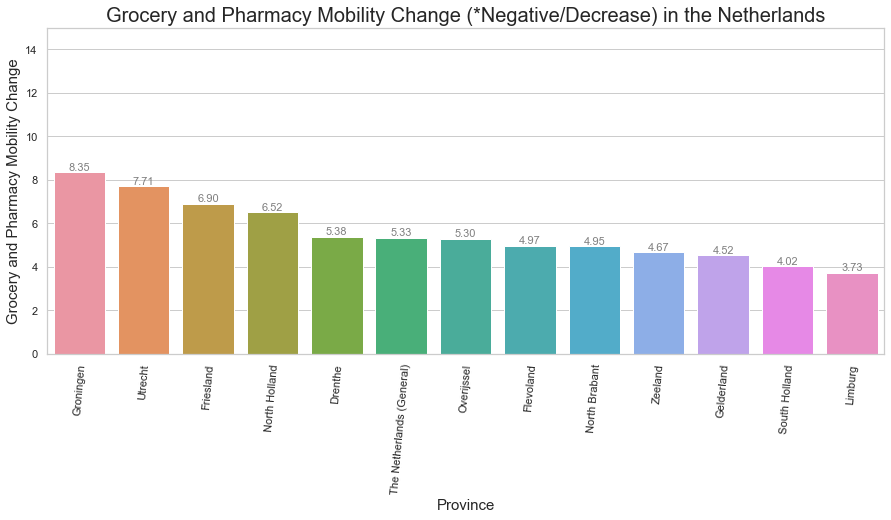

In [25]:
plt.figure(figsize=(15,6))
GP1=sns.barplot(x="Province", y="Grocery_and_Pharmacy", data=result_GP)
sns.set(style="whitegrid")
GP1.axes.set_title("Grocery and Pharmacy Mobility Change (*Negative/Decrease) in the Netherlands", fontsize=20)
GP1.set_xlabel("Province",fontsize=15)
GP1.set_ylabel("Grocery and Pharmacy Mobility Change",fontsize=15)
plt.xticks(rotation=85)
for p in GP1.patches:
             GP1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 5),
                 textcoords='offset points')
_ = GP1.set_ylim(0,15)

## D.Parks

__Mobility trends for places like local parks, national parks, public beaches, marinas, dog parks, plazas, and public gardens.__

### D.1. The General Trend of Mobility in Parks in the Netherlands 

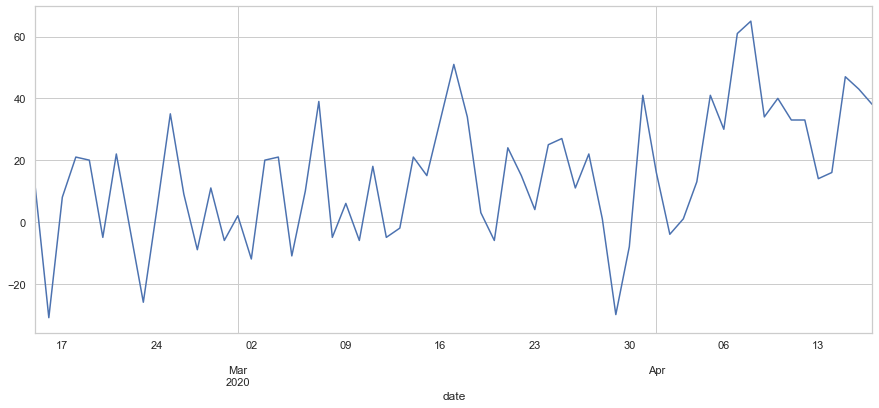

In [26]:
df_NL['Parks'].plot(figsize=(15,6))

### D.2. The Time Series Analysis by Provinces on the Mobility in Parks 

[None, None]

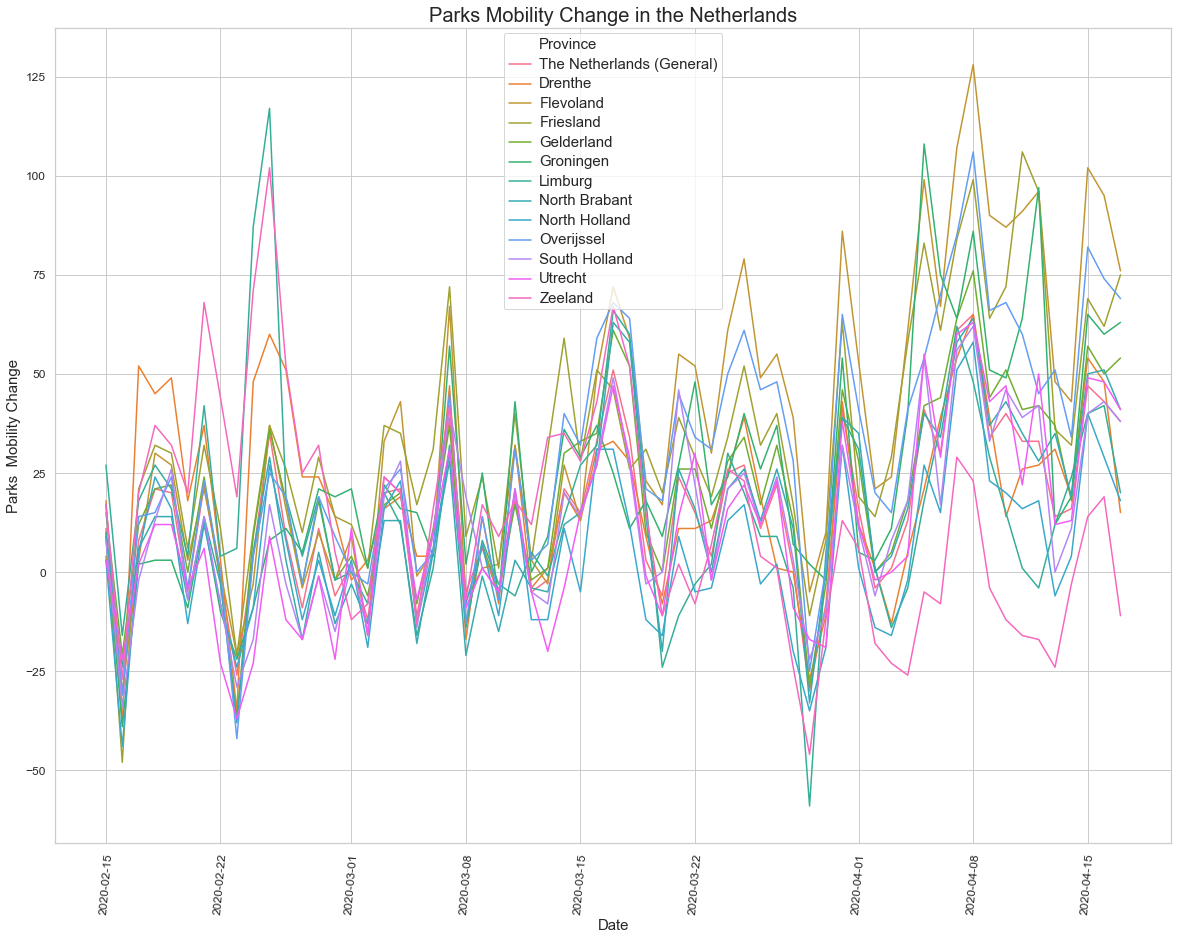

In [27]:
plt.figure(figsize=(20,15))
P=sns.lineplot(x="Date", y="Parks", hue='Province', data=df)
sns.set(style="whitegrid")
P.axes.set_title("Parks Mobility Change in the Netherlands",fontsize=20)
P.set_xlabel("Date",fontsize=15)
P.set_ylabel("Parks  Mobility Change",fontsize=15)
P.tick_params(labelsize=12)
plt.xticks(rotation=85)
plt.setp(P.get_legend().get_texts(), fontsize='15')
plt.setp(P.get_legend().get_title(), fontsize='15') 

### D.3. The Percentage Change by Provinces in the Mobility in Parks

In [28]:
result_P = df.groupby(["Province"])['Parks'].aggregate(np.mean).reset_index().sort_values('Parks', ascending=False)
result_P

,Province,Parks
1,Flevoland,36.809524
2,Friesland,34.190476
8,Overijssel,29.920635
4,Groningen,24.285714
3,Gelderland,20.365079
0,Drenthe,18.825397
5,Limburg,15.793651
10,The Netherlands (General),14.936508
6,North Brabant,14.047619
9,South Holland,13.269841


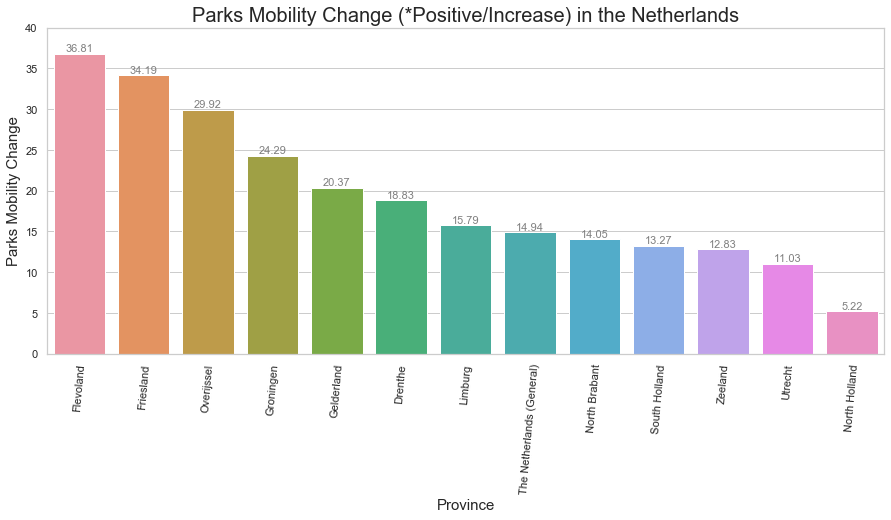

In [29]:
plt.figure(figsize=(15,6))
P1=sns.barplot(x="Province", y="Parks", data=result_P)
sns.set(style="whitegrid")
P1.axes.set_title("Parks Mobility Change (*Positive/Increase) in the Netherlands", fontsize=20)
P1.set_xlabel("Province",fontsize=15)
P1.set_ylabel("Parks Mobility Change",fontsize=15)
plt.xticks(rotation=85)
for p in P1.patches:
             P1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 5),
                 textcoords='offset points')
_ = P1.set_ylim(0,40)

## E. Transit Stations

__Mobility trends for places like public transport hubs such as subway, bus, and train stations.__

### E.1. The General Trend of Mobility in Transit Stations in the Netherlands 

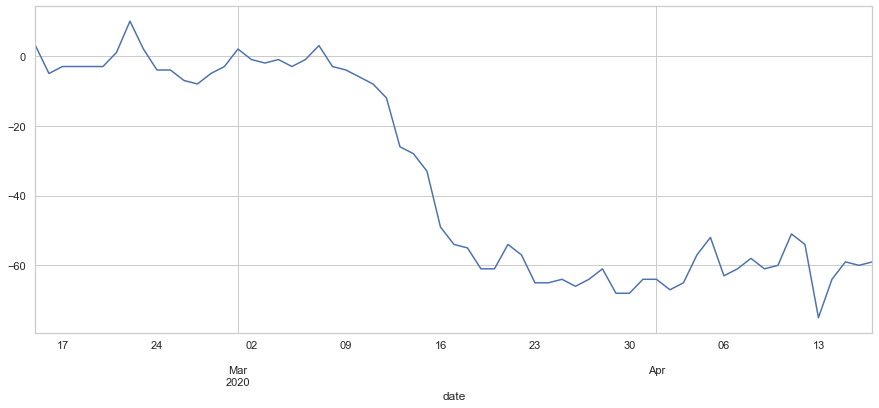

In [30]:
df_NL['Transit_Stations'].plot(figsize=(15,6))

### E.2. The Time Series Analysis by Provinces on the Mobility in Transit Stations 

[None, None]

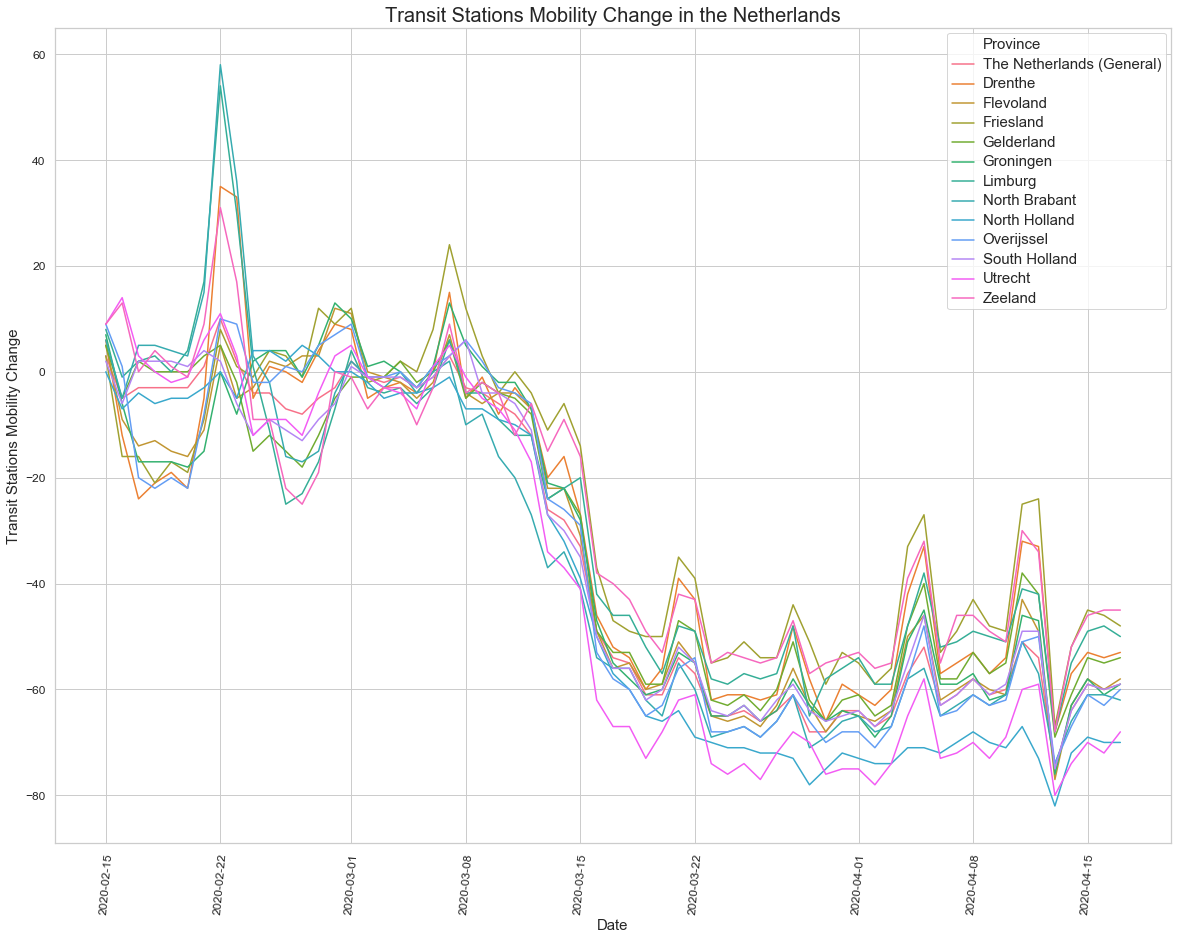

In [31]:
plt.figure(figsize=(20,15))
T=sns.lineplot(x="Date", y="Transit_Stations", hue='Province', data=df)
sns.set(style="whitegrid")
T.axes.set_title("Transit Stations Mobility Change in the Netherlands",fontsize=20)
T.set_xlabel("Date",fontsize=15)
T.set_ylabel("Transit Stations Mobility Change",fontsize=15)
T.tick_params(labelsize=12)
plt.xticks(rotation=85)
plt.setp(T.get_legend().get_texts(), fontsize='15')
plt.setp(T.get_legend().get_title(), fontsize='15') 

### E.3. The Percentage Change by Provinces in the Mobility in Transit Stations

In [32]:
result_T = df.groupby(["Province"])['Transit_Stations'].aggregate(np.mean).reset_index().sort_values('Transit_Stations', ascending=True)
result_T['Transit_Stations']=np.absolute(result_T['Transit_Stations'])
result_T

,Province,Transit_Stations
7,North Holland,39.380952
11,Utrecht,39.190476
8,Overijssel,34.841270
6,North Brabant,34.825397
10,The Netherlands (General),34.301587
9,South Holland,34.111111
1,Flevoland,33.476190
4,Groningen,33.047619
3,Gelderland,31.968254
0,Drenthe,29.730159


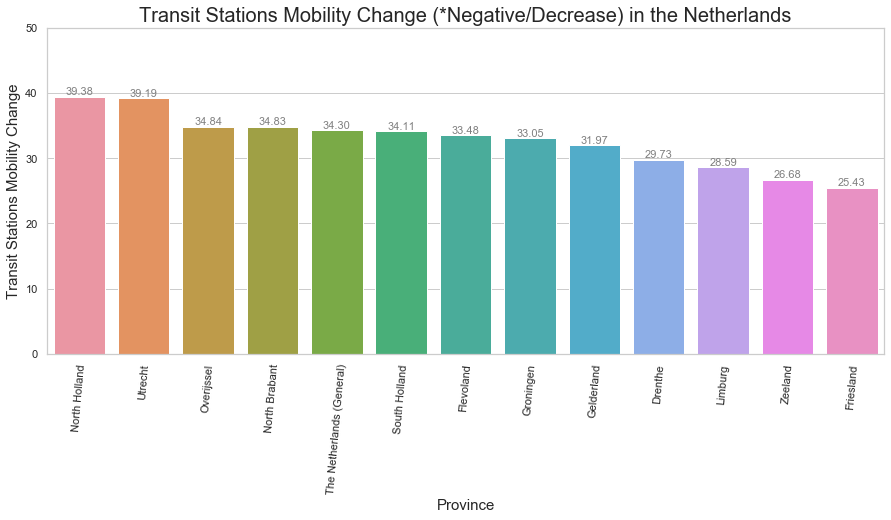

In [33]:
plt.figure(figsize=(15,6))
T1=sns.barplot(x="Province", y="Transit_Stations", data=result_T)
sns.set(style="whitegrid")
T1.axes.set_title("Transit Stations Mobility Change (*Negative/Decrease) in the Netherlands", fontsize=20)
T1.set_xlabel("Province",fontsize=15)
T1.set_ylabel("Transit Stations Mobility Change",fontsize=15)
plt.xticks(rotation=85)
for p in T1.patches:
             T1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 5),
                 textcoords='offset points')
_ = T1.set_ylim(0,50)

## F. Workplaces

__Mobility trends for places of work.__

### F.1. The General Trend of Mobility in Workplaces in the Netherlands 

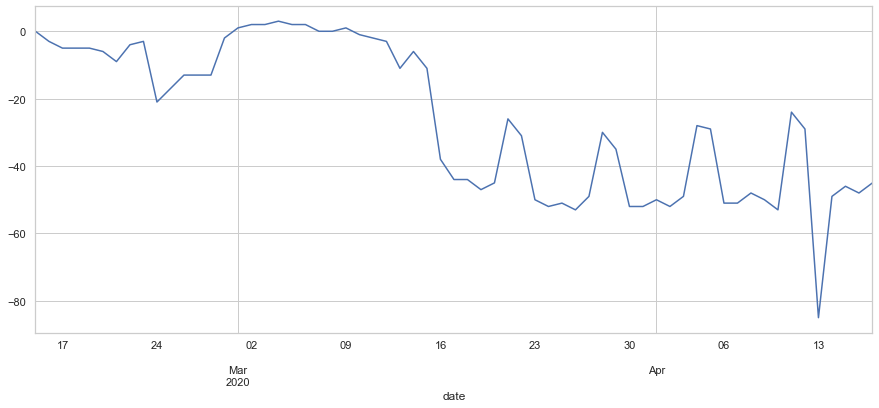

In [34]:
df_NL['Workplaces'].plot(figsize=(15,6))

### F.2. The Time Series Analysis by Provinces on the Mobility in Workplaces 

[None, None]

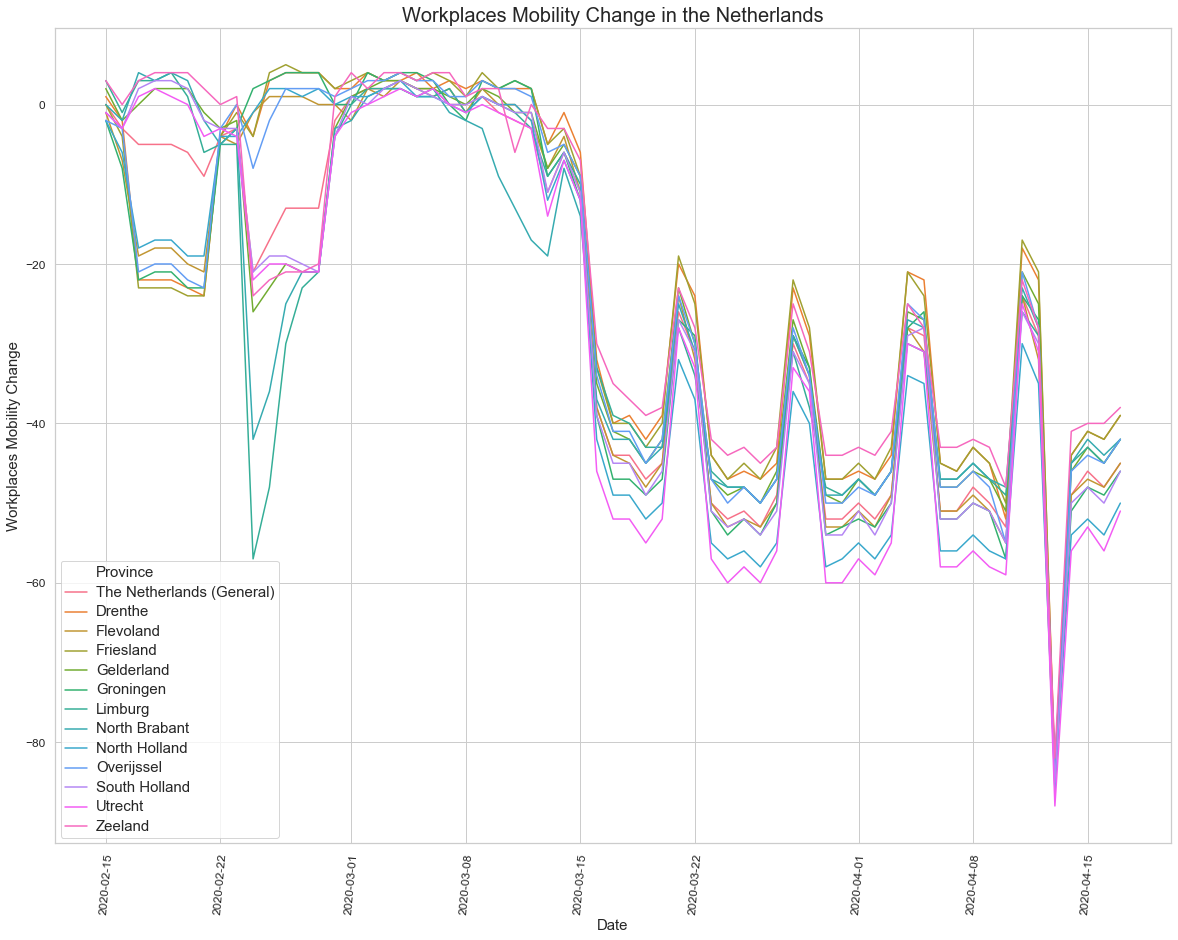

In [35]:
plt.figure(figsize=(20,15))
W=sns.lineplot(x="Date", y="Workplaces", hue='Province', data=df)
sns.set(style="whitegrid")
W.axes.set_title("Workplaces Mobility Change in the Netherlands",fontsize=20)
W.set_xlabel("Date",fontsize=15)
W.set_ylabel("Workplaces Mobility Change",fontsize=15)
W.tick_params(labelsize=12)
plt.xticks(rotation=85)
plt.setp(W.get_legend().get_texts(), fontsize='15')
plt.setp(W.get_legend().get_title(), fontsize='15') 

### F.3. The Percentage Change by Provinces in the Mobility in Workplaces

In [36]:
result_W = df.groupby(["Province"])['Workplaces'].aggregate(np.mean).reset_index().sort_values('Workplaces', ascending=True)
result_W['Workplaces']=np.absolute(result_W['Workplaces'])
result_W

,Province,Workplaces
11,Utrecht,29.095238
7,North Holland,28.269841
9,South Holland,26.190476
6,North Brabant,25.904762
1,Flevoland,25.857143
4,Groningen,25.825397
10,The Netherlands (General),25.809524
5,Limburg,25.730159
8,Overijssel,24.158730
3,Gelderland,24.126984


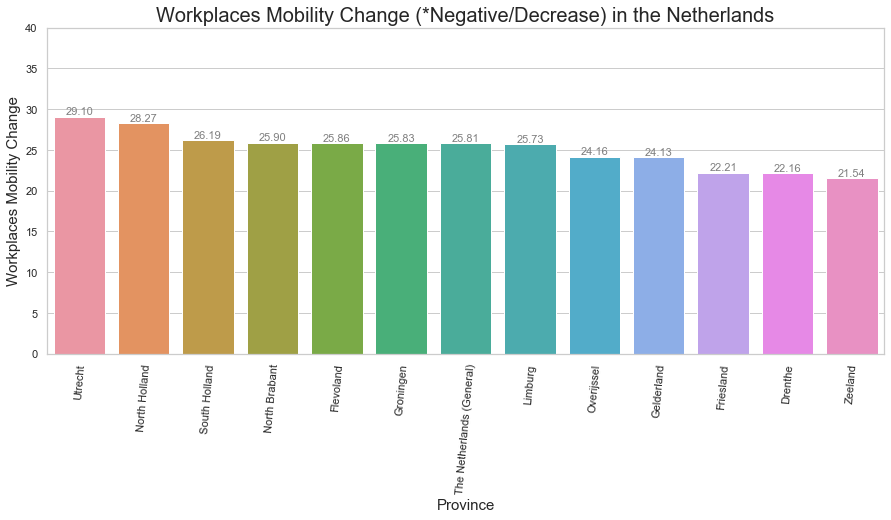

In [37]:
plt.figure(figsize=(15,6))
W1=sns.barplot(x="Province", y="Workplaces", data=result_W)
sns.set(style="whitegrid")
W1.axes.set_title("Workplaces Mobility Change (*Negative/Decrease) in the Netherlands", fontsize=20)
W1.set_xlabel("Province",fontsize=15)
W1.set_ylabel("Workplaces Mobility Change",fontsize=15)
plt.xticks(rotation=85)
for p in W1.patches:
             W1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 5),
                 textcoords='offset points')
_ = W1.set_ylim(0,40)

## G. Residences

__Mobility trends for places of residence.__

### G.1. The General Trend of Mobility in Residences in the Netherlands 

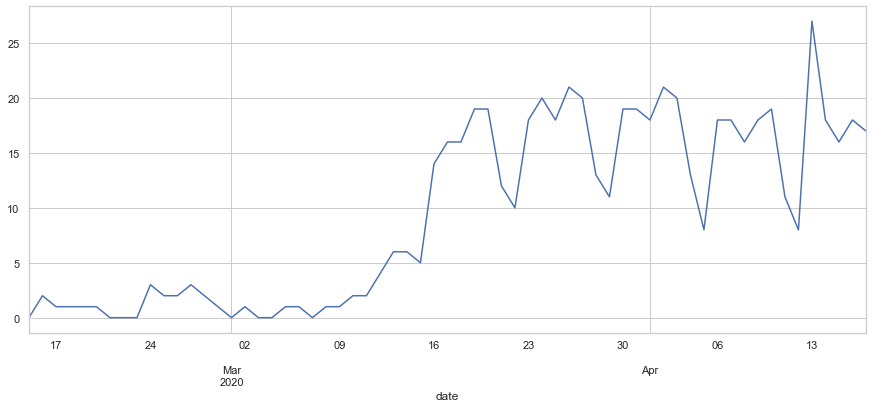

In [38]:
df_NL['Residences'].plot(figsize=(15,6))

### G.2. The Time Series Analysis by Provinces on the Mobility in Residences 

[None, None]

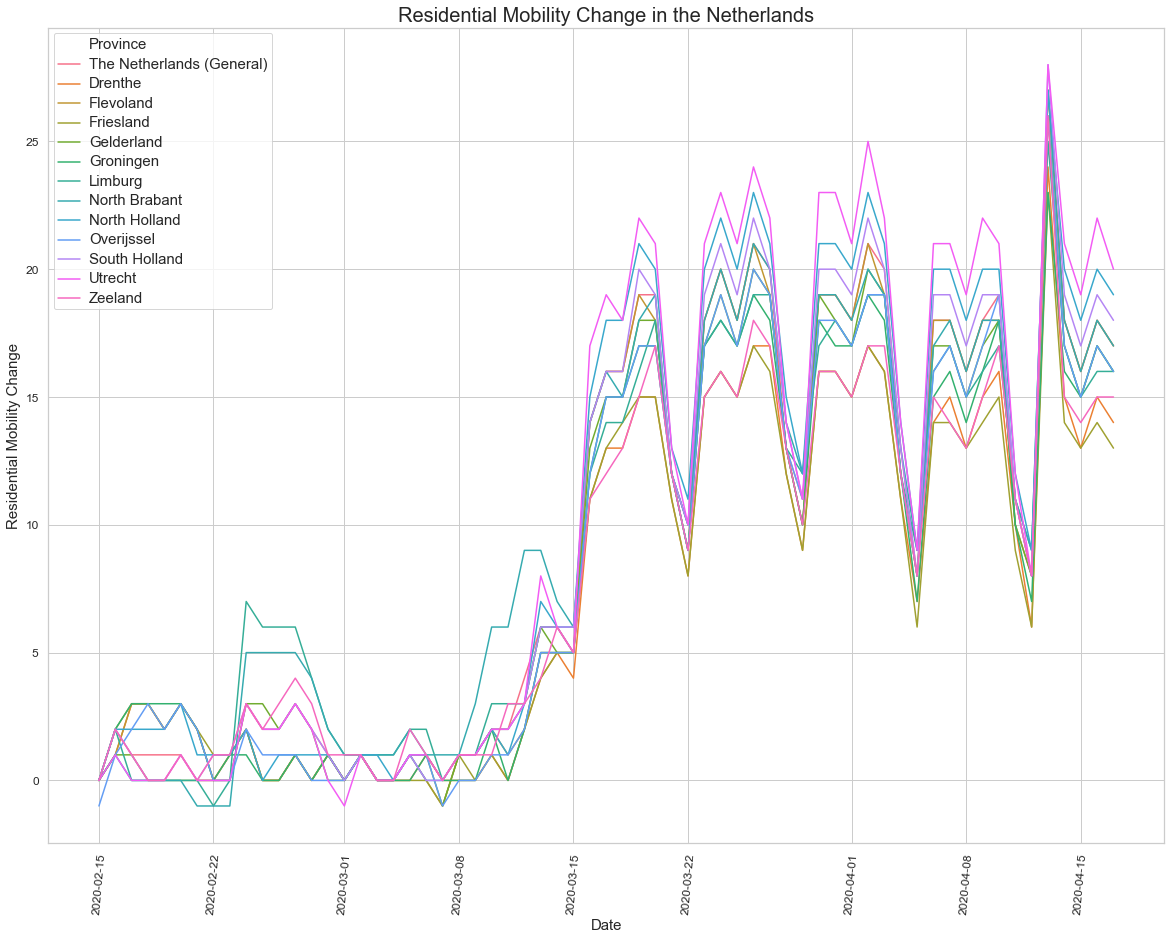

In [39]:
plt.figure(figsize=(20,15))
R=sns.lineplot(x="Date", y="Residences", hue='Province', data=df)
sns.set(style="whitegrid")
R.axes.set_title("Residential Mobility Change in the Netherlands",fontsize=20)
R.set_xlabel("Date",fontsize=15)
R.set_ylabel("Residential Mobility Change",fontsize=15)
R.tick_params(labelsize=12)
plt.xticks(rotation=85)
plt.setp(R.get_legend().get_texts(), fontsize='15')
plt.setp(R.get_legend().get_title(), fontsize='15') 

### G.3. The Percentage Change by Provinces in the Mobility in Residences

In [40]:
result_R= df.groupby(["Province"])['Residences'].aggregate(np.mean).reset_index().sort_values('Residences', ascending=False)
result_R

,Province,Residences
11,Utrecht,10.650794
7,North Holland,10.333333
6,North Brabant,9.936508
9,South Holland,9.777778
10,The Netherlands (General),9.492063
1,Flevoland,9.253968
5,Limburg,9.206349
3,Gelderland,8.936508
8,Overijssel,8.825397
4,Groningen,8.587302


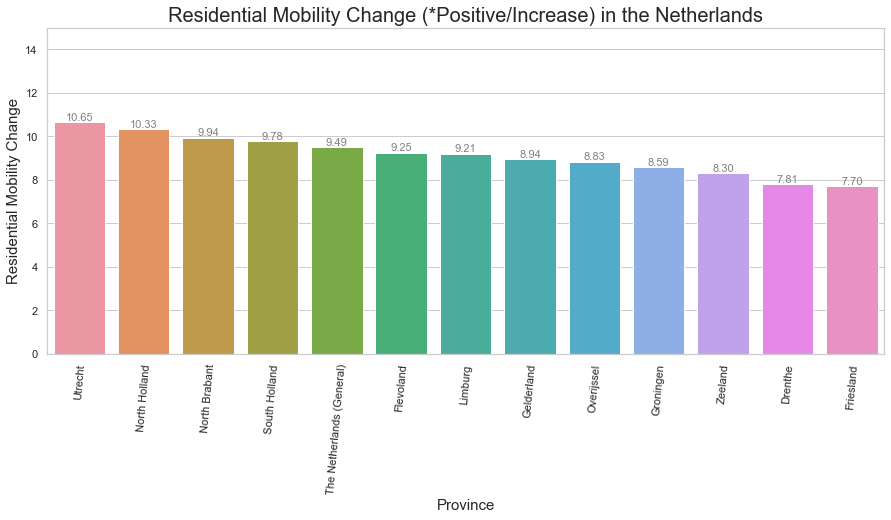

In [41]:
plt.figure(figsize=(15,6))
R1=sns.barplot(x="Province", y="Residences", data=result_R)
sns.set(style="whitegrid")
R1.axes.set_title("Residential Mobility Change (*Positive/Increase) in the Netherlands", fontsize=20)
R1.set_xlabel("Province",fontsize=15)
R1.set_ylabel("Residential Mobility Change",fontsize=15)
plt.xticks(rotation=85)
for p in R1.patches:
             R1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 5),
                 textcoords='offset points')
_ = R1.set_ylim(0,15)